# Yulu Business Case Study

## 1. Define Problem Statement and perform Exploratory Data Analysis 

### 1.1 Definition of problem 

Yulu, a leading micro-mobility service provider in India, has seen a decline in revenue and wants to understand the factors affecting the demand for their shared electric cycles in the Indian market. They aim to identify significant variables predicting the demand and analyze how well these variables describe the demand.


### 1.2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category', missing value detection, statistical summary.

In [6]:
# Importing required Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [7]:
# Loading the dataset
data = pd.read_csv("bike_sharing.csv")

In [8]:
# Observations on shape of data
print("Shape of the Dataset:")
print(data.shape)

Shape of the Dataset:
(10886, 12)


In [9]:
# Data types of all the attributes
print("\nData Types of Columns:")
print(data.dtypes)


Data Types of Columns:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [10]:
# Conversion of categorical attributes to 'category' 
# Check unique values for categorical columns
print("\nUnique values for categorical columns:")
print("Season:", data['season'].unique())
print("Holiday:", data['holiday'].unique())
print("Workingday:", data['workingday'].unique())
print("Weather:", data['weather'].unique())


# Convert categorical columns to 'category' data type
data['season'] = data['season'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weather'] = data['weather'].astype('category')


Unique values for categorical columns:
Season: [1 2 3 4]
Holiday: [0 1]
Workingday: [0 1]
Weather: [1 2 3 4]


In [11]:
# Number of Missing Values in Each Column
print("\nNumber of Missing Values in Each Column:")
print(data.isnull().sum())


Number of Missing Values in Each Column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [12]:
# Concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [13]:
# Statistical summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    

In [14]:
# Getting first 5 rows of the data
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
# Getting last 5 rows of the data
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


### 1.3 Univariate Analysis

#### 1.3.1 Continuous Variables
For continuous/numerical features such as temp, atemp, humidity, windspeed, casual, registered, and count, we will use histograms and distplots to analyze their distribution.

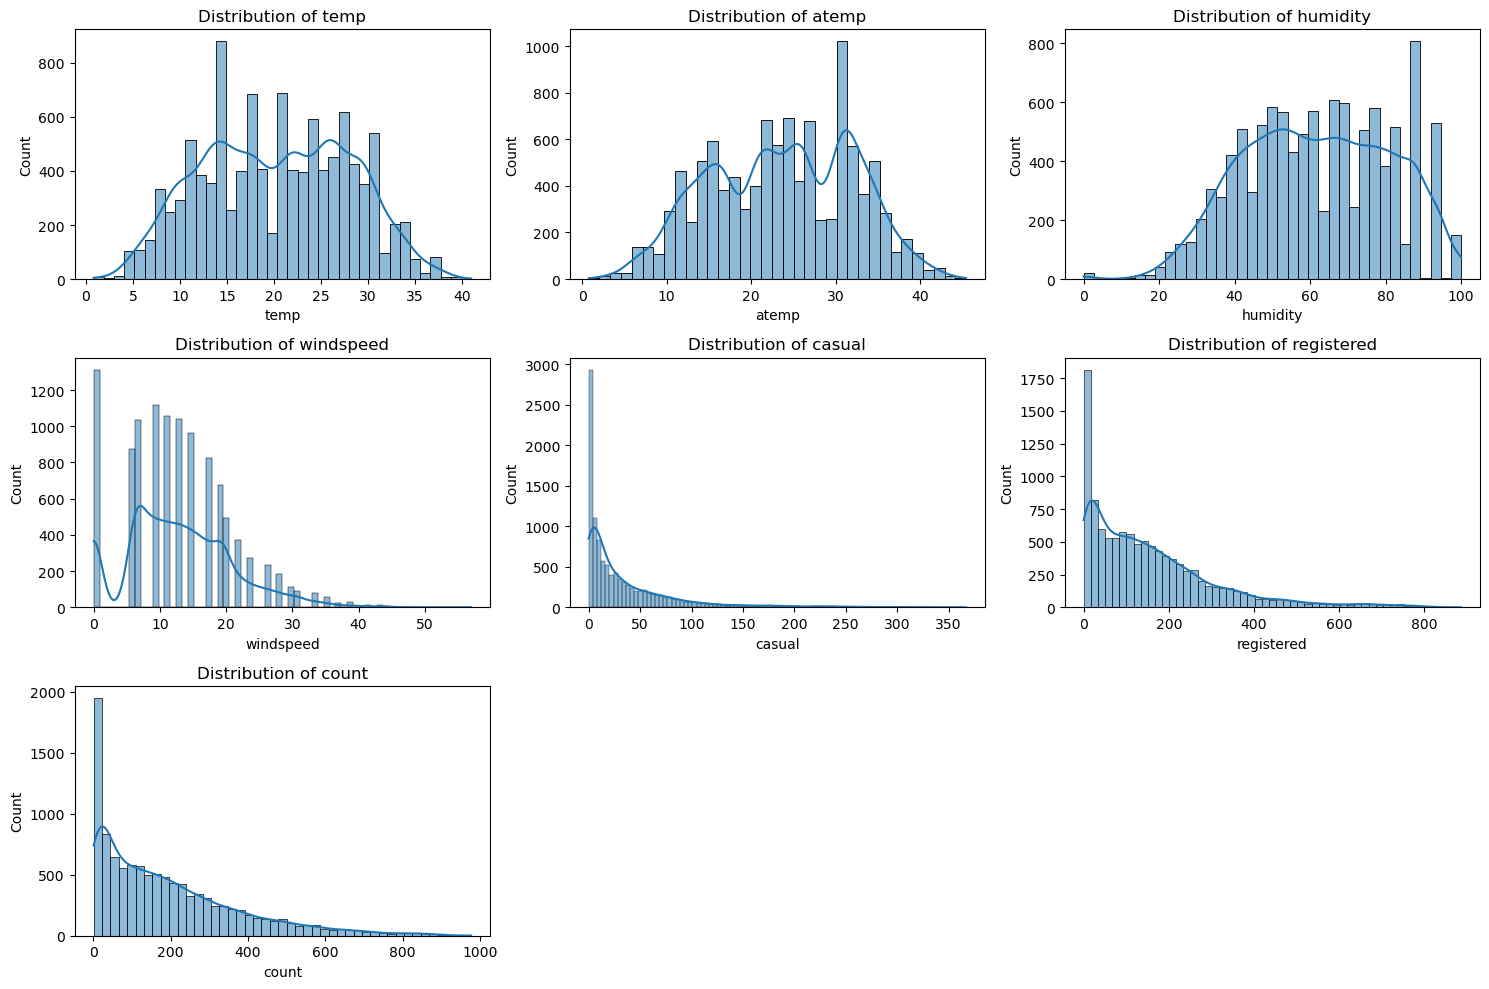

In [18]:
# Plot histograms for continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()


#### 1.3.2 Categorical Variables
For categorical features such as season, holiday, workingday, and weather, we will use countplots and pie charts.

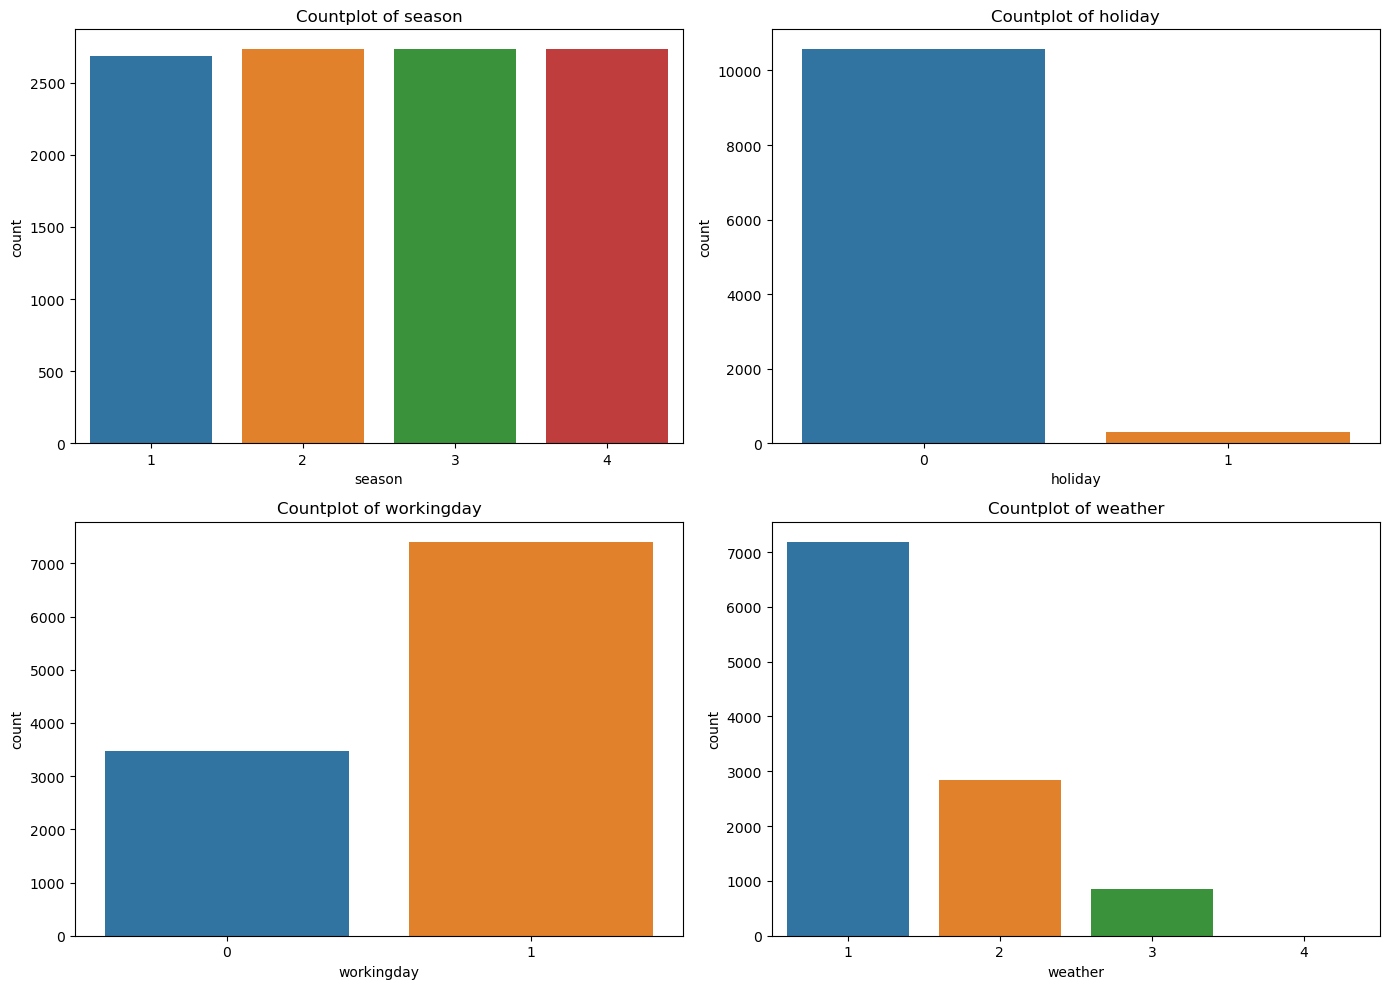

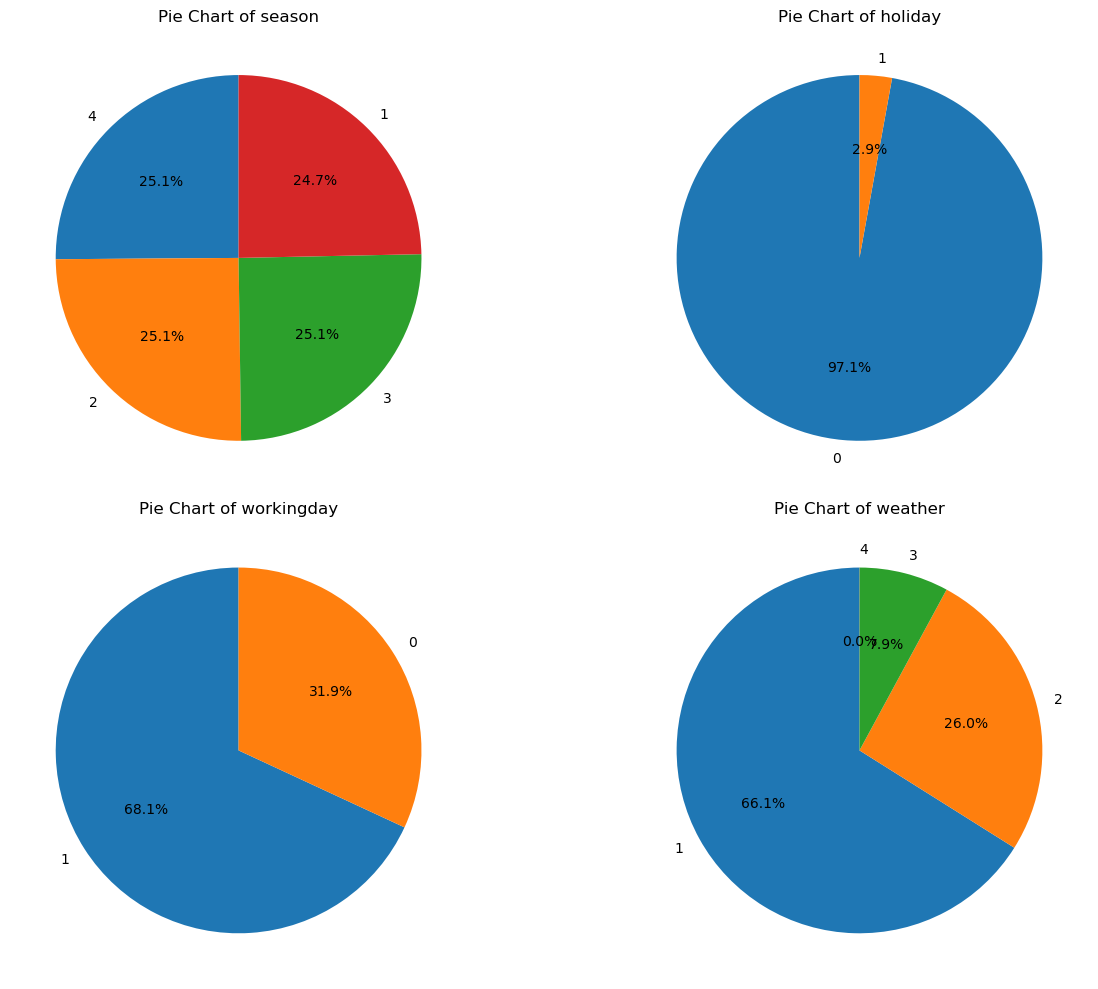

In [20]:
# Categorical columns
categorical_features = ['season', 'holiday', 'workingday', 'weather']

# Plotting countplots
plt.figure(figsize=(14, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=data[feature])
    plt.title(f'Countplot of {feature}')

plt.tight_layout()
plt.show()

# Plotting pie charts
plt.figure(figsize=(14, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    data[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {feature}')
    plt.ylabel('')  # Hide y-label

plt.tight_layout()
plt.show()

### 1.4 Bivariate Analysis

#### 1.4.1 Workday and Count

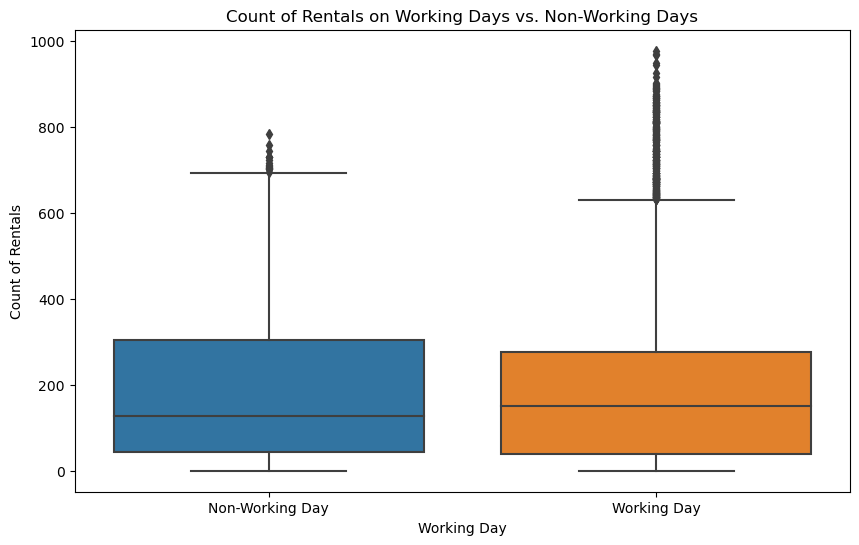

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64


In [23]:
# Plot the relationship between workday and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=data)
plt.title('Count of Rentals on Working Days vs. Non-Working Days')
plt.xlabel('Working Day')
plt.ylabel('Count of Rentals')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.show()

# Display mean counts for working and non-working days
print(data.groupby('workingday')['count'].mean())

#### 1.4.2 Season and Count

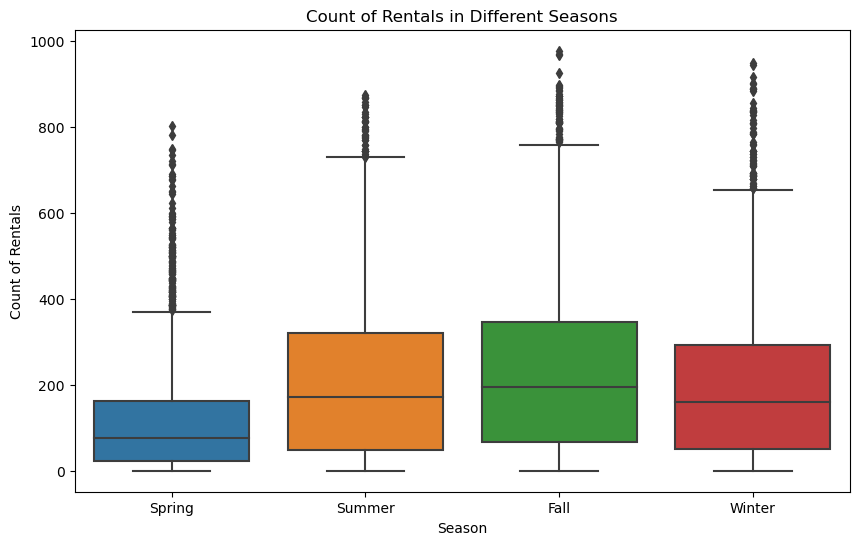

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


In [25]:
# Plot the relationship between season and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=data)
plt.title('Count of Rentals in Different Seasons')
plt.xlabel('Season')
plt.ylabel('Count of Rentals')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Display mean counts for different seasons
print(data.groupby('season')['count'].mean())

#### 1.4.3 Weather and Count

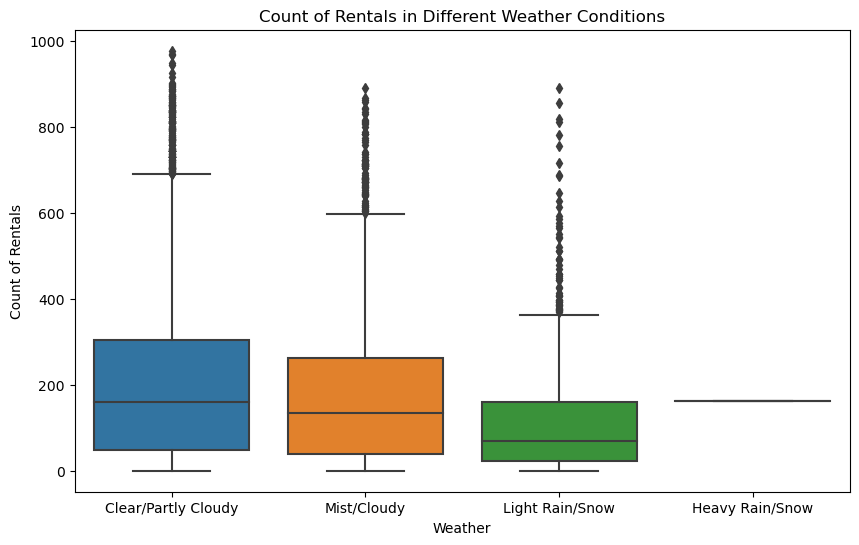

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


In [27]:
# Plot the relationship between weather and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=data)
plt.title('Count of Rentals in Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count of Rentals')
plt.xticks([0, 1, 2, 3], ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

# Display mean counts for different weather conditions
print(data.groupby('weather')['count'].mean())

#### 1.4.4 Establishing Relationships Between Dependent and Independent Variables using Heatmap
Plotting a Correlation Heatmap
To understand the relationships between the dependent variable (count) and the independent variables, we will plot a correlation heatmap.

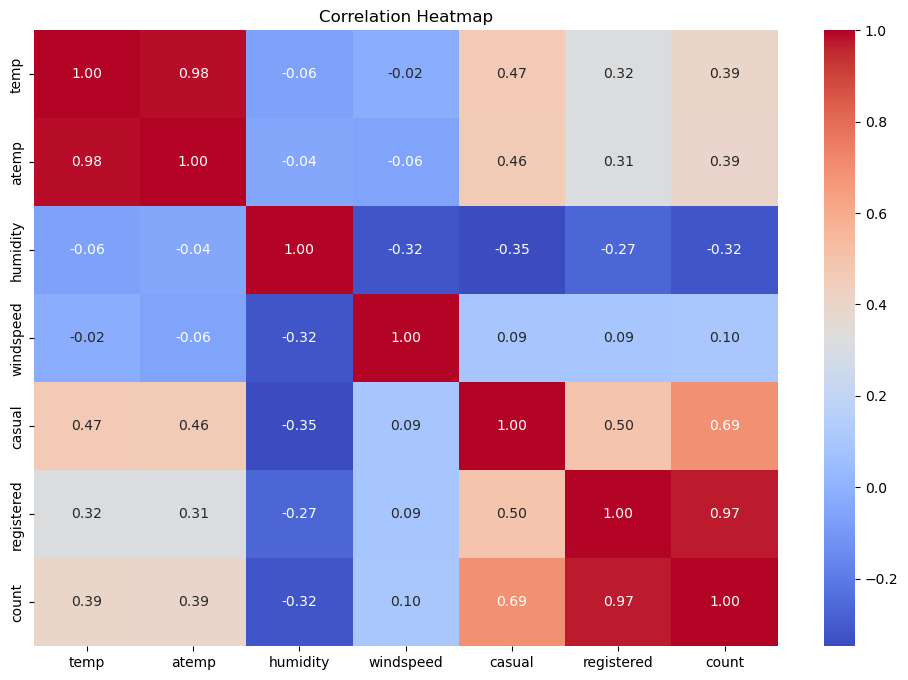

In [29]:
# Ensure to exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Remove the highly correlated variables (atemp), from the Heatmap.

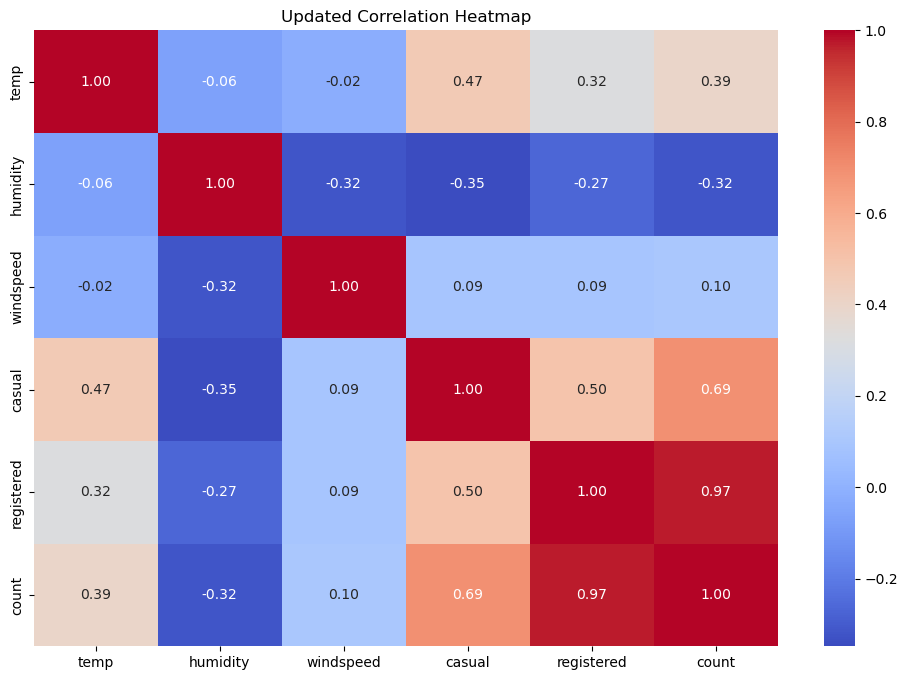

In [31]:
# Assuming 'atemp' has already been removed as discussed previously
numeric_data_updated = numeric_data.drop(columns=['atemp'])

# Recompute the correlation matrix after removing 'atemp'
correlation_matrix_updated = numeric_data_updated.corr()

# Plot the updated heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Updated Correlation Heatmap')
plt.show()

#### 1.4.5 Checking for Outliers and Dealing with Them
We will use boxplots and the Interquartile Range (IQR) method to identify and deal with outliers.

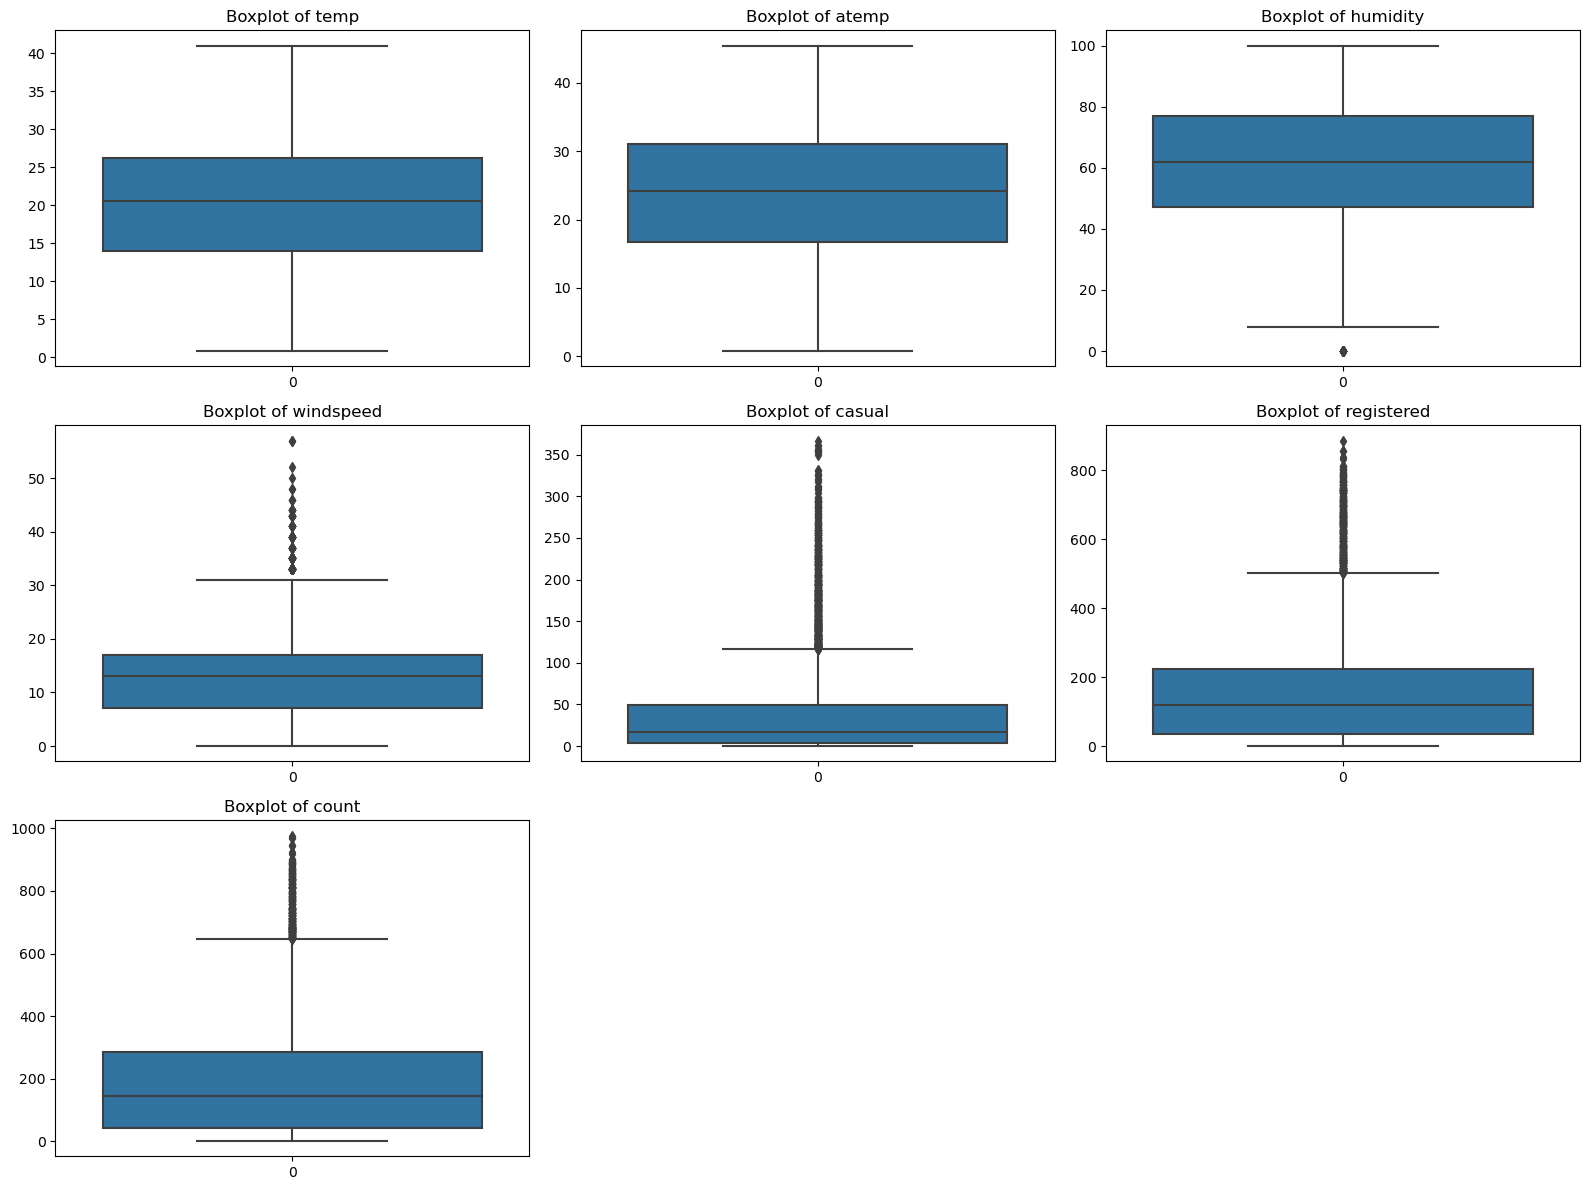

In [33]:
# Boxplot for detecting outliers
plt.figure(figsize=(16, 12))


# Numerical columns
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

#### Removing/Clipping Outliers Using IQR
The IQR method will help in identifying the threshold beyond which a data point is considered an outlier.

In [35]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from numerical features
for feature in numerical_features:
    data = remove_outliers(data, feature)

#### Checking for Outliers to ensure they're dealt with.

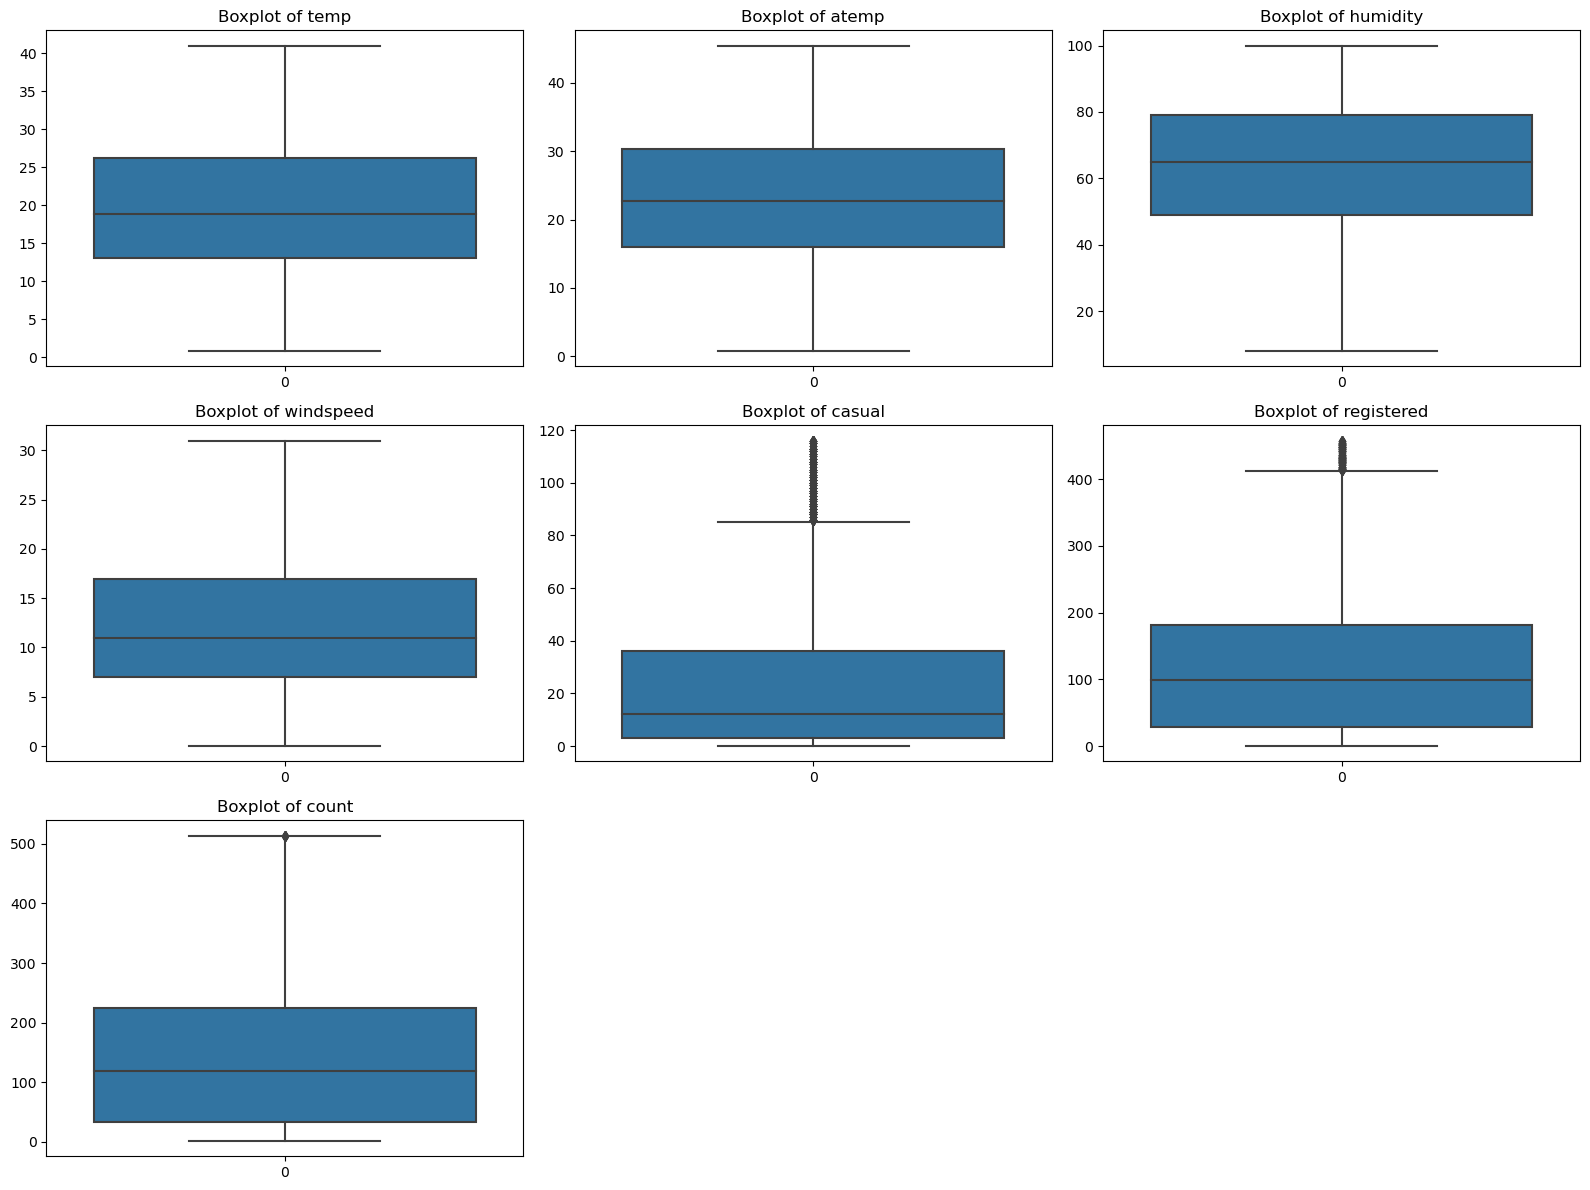

In [37]:
# Boxplot for detecting outliers
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

### 1.5 Illustrating the Insights Based on EDA
#### 1.5.1 Comments on Range of Attributes and Outliers

##### I. temp (Temperature in Celsius):

-Range: Approximately from 0°C to 40°C.

-Outliers: No significant outliers observed.

-Distribution: Bimodal distribution with peaks around 10-15°C and 25-30°C.

##### II. atemp (Feeling Temperature in Celsius):

-Range: Approximately from 0°C to 50°C.

-Outliers: No significant outliers observed.

-Distribution: Bimodal distribution with peaks around 10-15°C and 25-35°C.

##### III. humidity (Humidity):

-Range: Approximately from 0% to 100%.

-Outliers: Few outliers observed near the extremes (0% and 100%).

-Distribution: Skewed distribution with more data points in the higher humidity range (60%-100%).

##### IV. windspeed (Wind Speed):

-Range: Approximately from 0 to 50 units.

-Outliers: Some outliers observed at higher wind speeds.

-Distribution: Right-skewed distribution with a majority of data points at lower wind speeds.

##### V. casual (Count of Casual Users):

-Range: Approximately from 0 to 350.

-Outliers: Outliers present at higher counts.

-Distribution: Highly right-skewed distribution with most counts between 0 and 50.

##### VI. registered (Count of Registered Users):

-Range: Approximately from 0 to 900.

-Outliers: Outliers present at higher counts.

-Distribution: Right-skewed distribution with a peak at lower counts and a gradual decline.

##### VII. count (Total Rental Count):

-Range: Approximately from 0 to 1000.

-Outliers: Outliers present at higher counts.

-Distribution: Highly right-skewed distribution with a peak at lower counts and a gradual decline.

##### VIII. season (Season)

-Range: Approximately from 1 to 4.

-Distribution: The seasons are evenly distributed, with fall being the majority and spring the minority in the dataset.

##### IX. holiday (Holiday)

-Range: Approximately from 0 to 1. Where 0 represents a non-holiday and 1 represents holiday.

-Distribution: Non-holiday days dominate the dataset, with holidays making up a very small proportion.

##### X. workingday (Workingday)

-Range: Approximately from 0 to 1. Where 0 represents a non-working day and 1 represents a working day.

-Distribution: There are more working days than non-working days in the dataset.

##### XI. weather (Weather)

-Range: Approximately from 1 to 4. 

-Distribution: The majority of the days fall under the 'Clear' category, with fewer days experiencing 'Mist' and 'Rain/Snow/Storm'.



#### 1.5.2 Comments on the Distribution of Variables and Relationships Between Them

-temp and atemp have similar bimodal distributions, indicating a relationship where the feeling temperature aligns closely with the actual temperature.

-humidity shows a skewed distribution towards higher values, suggesting a tendency for higher humidity in the dataset.

-windspeed is predominantly low, with a right-skewed distribution indicating fewer instances of high wind speeds.

-casual and registered users both show right-skewed distributions, indicating a larger number of low-frequency users and fewer high-frequency users.

-count (total rental count) also shows a right-skewed distribution, indicating most rental counts are on the lower end with fewer high rental counts.

-Count vs. Registered: There is a strong positive correlation between count and registered users, indicating that most of the bike rentals are done by registered users.

-Count vs. Casual: There is a moderate positive correlation between count and casual users, indicating that casual users also contribute to the total rentals.

-temp and count: Indicates that as the temperature increases, the number of rentals tends to increase, which is logical for bike rentals.

-atemp and count: Similarly, the perceived temperature also shows a positive relationship with the rental count.

-humidity and count: Heatmap Shows that higher humidity might slightly decrease the number of rentals, which could be due to discomfort.

-windspeed and count: Heatmap Indicates that higher wind speeds might deter bike rentals.




#### 1.5.3 Comments for Each Univariate and Bivariate Plot
##### Univariate Plots

##### I. Temperature (temp):

-The temperature distribution shows two peaks, indicating that rentals occur during two favorable temperature ranges.

-No significant outliers, suggesting consistent temperature data.

##### II. Feeling Temperature (atemp):

-Similar to temperature, the distribution of feeling temperature also shows two peaks.

-This similarity highlights the close alignment between actual and perceived temperatures.

##### III. Humidity:

-The distribution is skewed towards higher humidity levels, with occasional lower values.

-Outliers at the extremes suggest rare occurrences of extremely low or high humidity.

##### IV. Wind Speed:

-The distribution of wind speed is highly right-skewed, indicating that most of the time, the wind speed is low.

-Outliers are present at higher wind speeds.

##### V. Casual Users:

-The distribution is highly right-skewed with most casual user counts being low.

-Significant outliers indicate occasional spikes in casual usage.

##### VI. Registered Users:

-The distribution is right-skewed, showing a peak at lower counts and a long tail.

-Outliers suggest high usage by some registered users.

##### VII. Total Count (count):

-The count distribution is highly right-skewed, indicating that lower rental counts are more common.

-The presence of outliers suggests occasional high rental activity.

## 2. Hypothesis Testing

### 2.1 2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented.

Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):

H0: There is no significant difference between the number of bike rides on weekdays and weekends.

H1: There is a significant difference between the number of bike rides on weekdays and weekends.

In [42]:
# Separate weekday and weekend rides
weekday_rides = data[data['workingday'].isin([1])]['count'].tolist()
weekend_rides = data[data['workingday'].isin([0])]['count'].tolist()

# Calculate t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(weekday_rides, weekend_rides)

# Set significance level (alpha)
alpha = 0.05

print("t-test: p-value =",p_value)
# Decide whether to accept or reject the Null Hypothesis
if p_value <= alpha:
    print("Reject Null Hypothesis: There is a significant difference between the number of bike rides on weekdays and weekends.")
else:
    print("Do not reject Null Hypothesis: There is no significant difference between the number of bike rides on weekdays and weekends.")

# Draw inferences & conclusions and provide recommendations
if p_value <= alpha:
    print("Inferences: There is enough evidence to suggest that the number of bike rides significantly differs between weekdays and weekends.")
    print("Recommendations: Consider adjusting bike rental services or promotions based on weekdays and weekends.")
else:
    print("Inferences: There is not enough evidence to suggest a significant difference in the number of bike rides between weekdays and weekends.")
    print("Recommendations: Continue monitoring bike ride patterns to see if any trends emerge over time.")


t-test: p-value = 2.2552148137228035e-33
Reject Null Hypothesis: There is a significant difference between the number of bike rides on weekdays and weekends.
Inferences: There is enough evidence to suggest that the number of bike rides significantly differs between weekdays and weekends.
Recommendations: Consider adjusting bike rental services or promotions based on weekdays and weekends.


### 2.2 ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 

Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):

H0: The demand for bicycles on rent is the same for different weather conditions.

H1: The demand for bicycles on rent varies across different weather conditions.

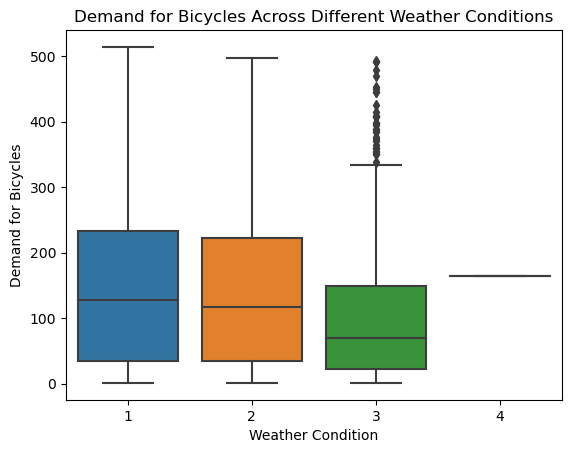

C:\Users\Minisha\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for 1: p-value = 0.0


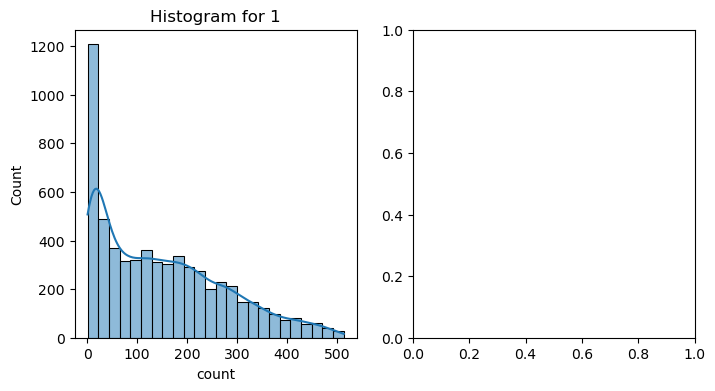

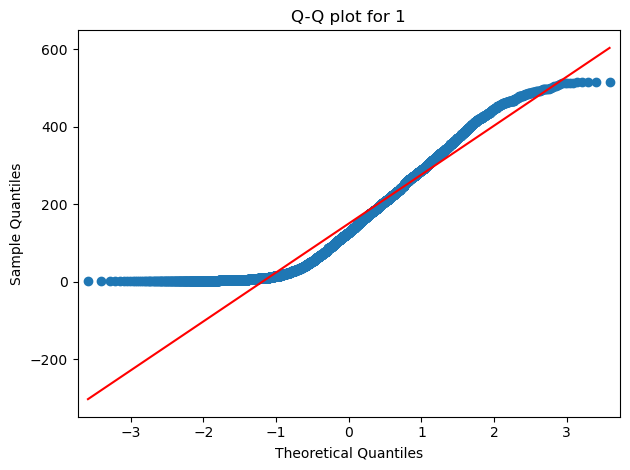

Shapiro-Wilk test for 2: p-value = 2.751328901961659e-35


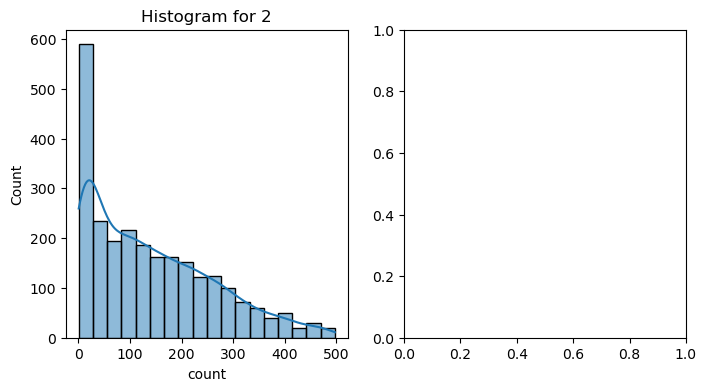

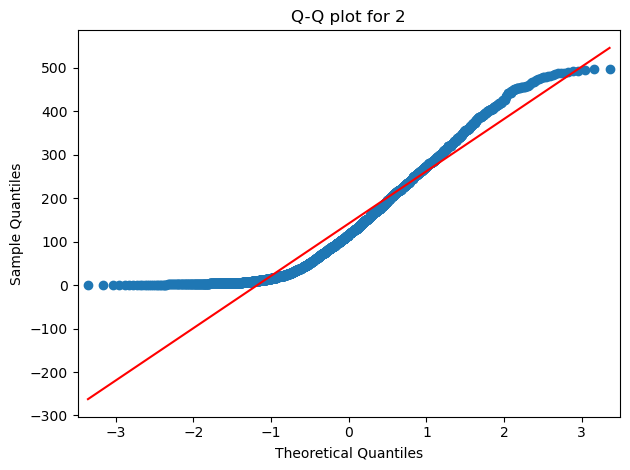

Shapiro-Wilk test for 3: p-value = 2.4175989050715022e-26


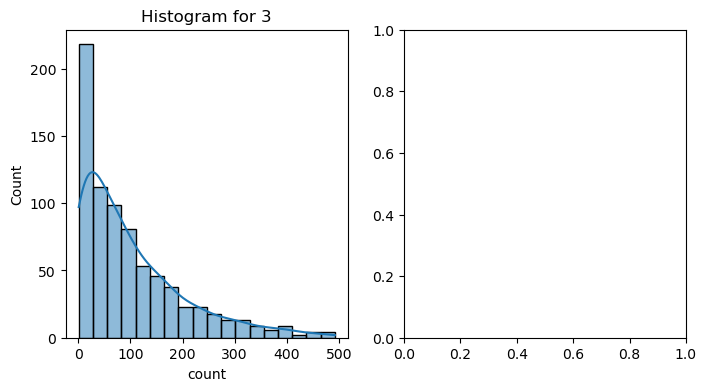

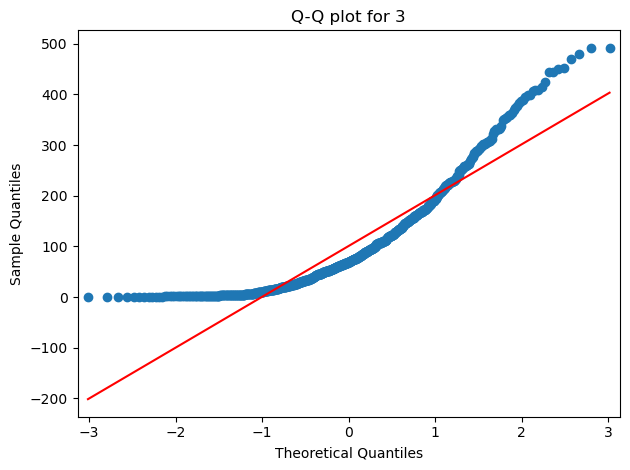

Not enough data points for 4 to perform Shapiro-Wilk test


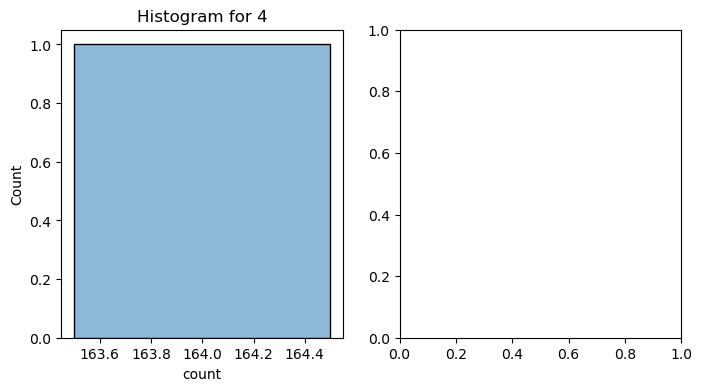

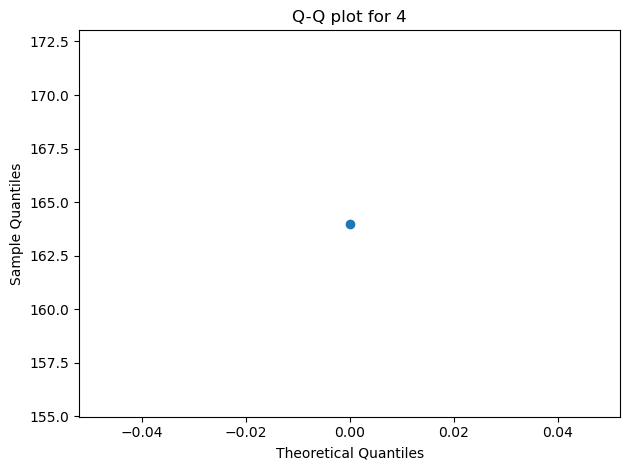

Levene's test: p-value = 1.841684372672214e-25
Reject Null Hypothesis: The demand for bicycles on rent varies significantly across different weather conditions.
Inferences: There is enough evidence to suggest that the demand for bicycles significantly differs across different weather conditions.
Recommendations: Adjust bike rental services based on weather conditions to meet varying demand.


In [45]:
# Check the distribution of demand for bicycles across different weather conditions
sns.boxplot(x='weather', y='count', data=data)
plt.title('Demand for Bicycles Across Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Demand for Bicycles')
plt.show()

# Check assumptions
# Normality
weather_conditions = data['weather'].unique()
for condition in weather_conditions:
    condition_data = data[data['weather'] == condition]['count']
    if len(condition_data) >= 3:
        stat, p = stats.shapiro(condition_data)
        print(f"Shapiro-Wilk test for {condition}: p-value = {p}")
    else:
        print(f"Not enough data points for {condition} to perform Shapiro-Wilk test")

    # Visual checks for normality
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(condition_data, kde=True)
    plt.title(f'Histogram for {condition}')

    plt.subplot(1, 2, 2)
    sm.qqplot(condition_data, line='s')
    plt.title(f'Q-Q plot for {condition}')

    plt.tight_layout()
    plt.show()

# Equality of variance
levene_stat, levene_p = stats.levene(*[data[data['weather'] == condition]['count'] for condition in weather_conditions])
print(f"Levene's test: p-value = {levene_p}")

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[data[data['weather'] == condition]['count'] for condition in weather_conditions])

# Set significance level (alpha)
alpha = 0.05

# Decide whether to accept or reject the Null Hypothesis
if p_value <= alpha:
    print("Reject Null Hypothesis: The demand for bicycles on rent varies significantly across different weather conditions.")
else:
    print("Do not reject Null Hypothesis: The demand for bicycles on rent is the same for different weather conditions.")

# Draw inferences & conclusions and provide recommendations
if p_value <= alpha:
    print("Inferences: There is enough evidence to suggest that the demand for bicycles significantly differs across different weather conditions.")
    print("Recommendations: Adjust bike rental services based on weather conditions to meet varying demand.")
else:
    print("Inferences: There is not enough evidence to suggest a significant difference in the demand for bicycles across different weather conditions.")
    print("Recommendations: Continue monitoring bike rental demand across various weather conditions for future adjustments.")

### 2.3 ANNOVA to check if No. of cycles rented is similar or different in different 2. season 

Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):

H0: The demand for bicycles on rent is the same for different seasons.

H1: The demand for bicycles on rent varies across different seasons.

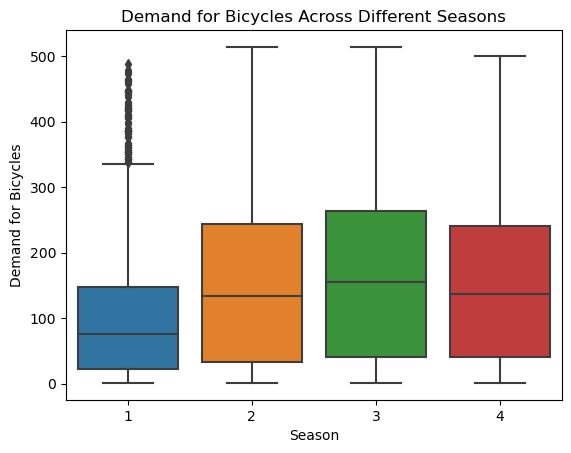

Shapiro-Wilk test for 1: p-value = 5.797452006604633e-41


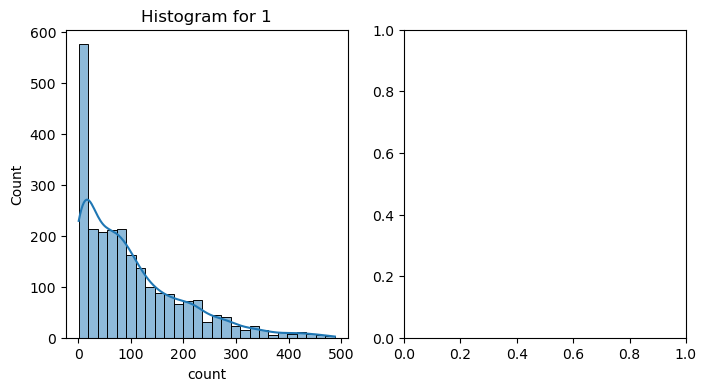

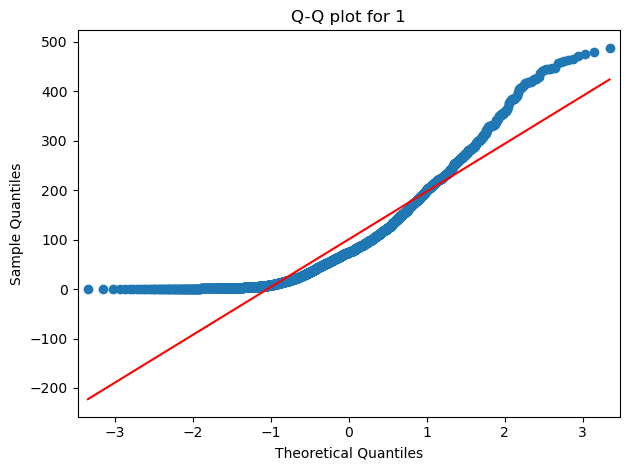

Shapiro-Wilk test for 2: p-value = 1.919612837745917e-32


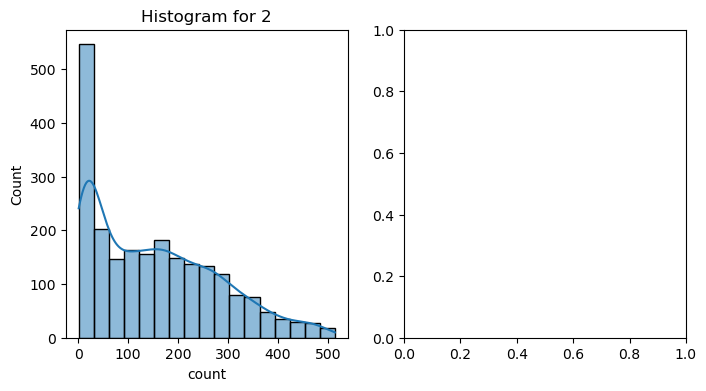

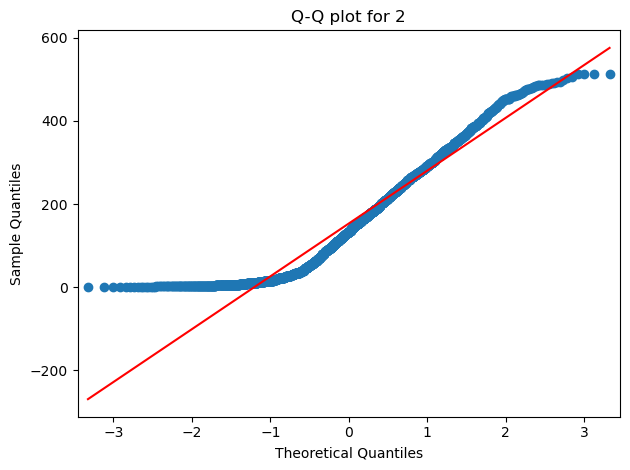

Shapiro-Wilk test for 3: p-value = 9.574166388577367e-30


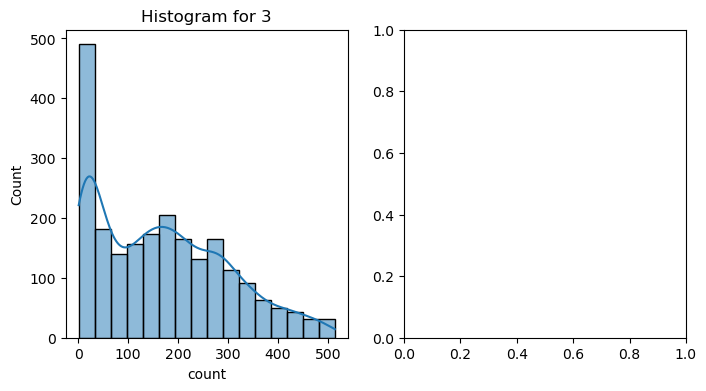

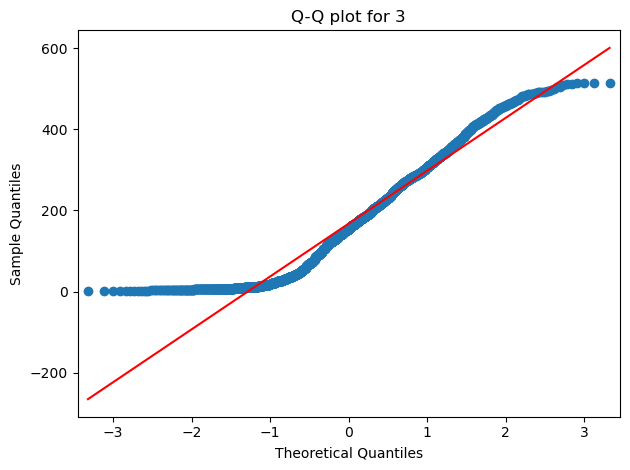

Shapiro-Wilk test for 4: p-value = 2.6257778446909593e-32


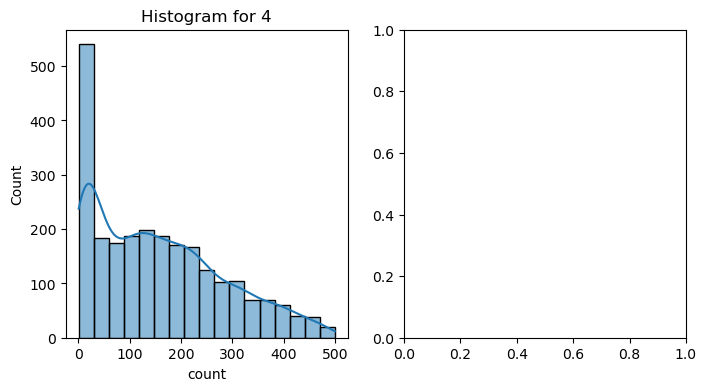

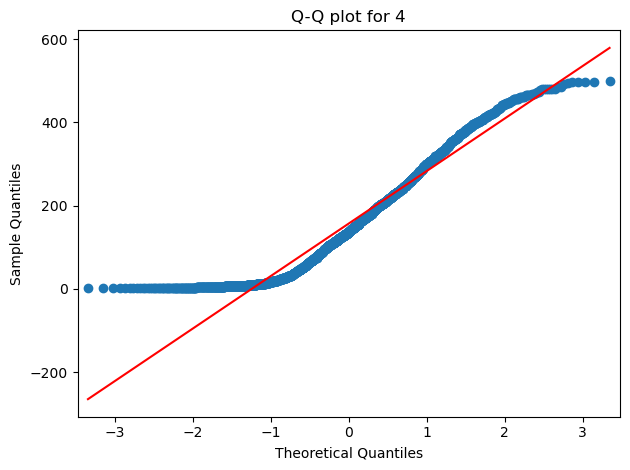

Levene's test: p-value = 1.4156739715299946e-85
Reject Null Hypothesis: The demand for bicycles on rent varies significantly across different seasons.
Inferences: There is enough evidence to suggest that the demand for bicycles significantly differs across different seasons.
Recommendations: Adjust bike rental services based on seasonal variations to meet varying demand.


In [48]:
# Check the distribution of demand for bicycles across different seasons
sns.boxplot(x='season', y='count', data=data)
plt.title('Demand for Bicycles Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Demand for Bicycles')
plt.show()

# Check assumptions
# Normality
seasons = data['season'].unique()
for season in seasons:
    season_data = data[data['season'] == season]['count']
    if len(season_data) >= 3:
        stat, p = stats.shapiro(season_data)
        print(f"Shapiro-Wilk test for {season}: p-value = {p}")
    else:
        print(f"Not enough data points for {season} to perform Shapiro-Wilk test")

    # Visual checks for normality
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(season_data, kde=True)
    plt.title(f'Histogram for {season}')

    plt.subplot(1, 2, 2)
    sm.qqplot(season_data, line='s')
    plt.title(f'Q-Q plot for {season}')

    plt.tight_layout()
    plt.show()

# Equality of variance
levene_stat, levene_p = stats.levene(*[data[data['season'] == season]['count'] for season in seasons])
print(f"Levene's test: p-value = {levene_p}")

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[data[data['season'] == season]['count'] for season in seasons])

# Set significance level (alpha)
alpha = 0.05

# Decide whether to accept or reject the Null Hypothesis
if p_value <= alpha:
    print("Reject Null Hypothesis: The demand for bicycles on rent varies significantly across different seasons.")
else:
    print("Do not reject Null Hypothesis: The demand for bicycles on rent is the same for different seasons.")

# Draw inferences & conclusions and provide recommendations
if p_value <= alpha:
    print("Inferences: There is enough evidence to suggest that the demand for bicycles significantly differs across different seasons.")
    print("Recommendations: Adjust bike rental services based on seasonal variations to meet varying demand.")
else:
    print("Inferences: There is not enough evidence to suggest a significant difference in the demand for bicycles across different seasons.")
    print("Recommendations: Continue monitoring bike rental demand across various seasons for future adjustments.")


### 2.4 Chi-square test to check if Weather is dependent on the season

Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):

H0: Weather conditions are independent of seasons (no association).

H1: Weather conditions are dependent on seasons (there is an association).

In [51]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['season'], data['weather'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"Chi-square test p-value: {p}")

# Set significance level (alpha)
alpha = 0.05

# Decide whether to accept or reject the Null Hypothesis
if p <= alpha:
    print("Reject Null Hypothesis: Weather conditions are significantly different during different seasons.")
else:
    print("Do not reject Null Hypothesis: Weather conditions are not significantly different during different seasons.")

# Draw inferences & conclusions and provide recommendations
if p <= alpha:
    print("Inferences: There is enough evidence to suggest that weather conditions significantly differ across different seasons.")
    print("Recommendations: Consider seasonal variations when planning weather-dependent activities or services.")
else:
    print("Inferences: There is not enough evidence to suggest a significant difference in weather conditions across different seasons.")
    print("Recommendations: Continue monitoring weather patterns across seasons for future planning and adjustments.")


Contingency Table:
weather     1    2    3  4
season                    
1        1583  680  184  1
2        1436  610  203  0
3        1557  500  173  0
4        1483  743  211  0
Chi-square test p-value: 7.37899576712981e-08
Reject Null Hypothesis: Weather conditions are significantly different during different seasons.
Inferences: There is enough evidence to suggest that weather conditions significantly differ across different seasons.
Recommendations: Consider seasonal variations when planning weather-dependent activities or services.
